# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** I Komang Maheza Yudistia
- **Email:** mahezayudistia27@gmail.com
- **ID Dicoding:** mahezaydst

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah ada perbedaan yang signifikan antara penyewaan sepeda pada hari kerja (weekday) dan akhir pekan (weekend)?

- Pertanyaan 2: Bagaimana pengaruh situasi cuaca terhadap total penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [19]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Mengatur style untuk seaborn
sns.set_style('darkgrid')

## Data Wrangling

### Gathering Data

In [2]:
# 1. Unggah file CSV ke Colab
from google.colab import files

# Unggah file, ini akan membuka dialog untuk memilih file dari komputer Anda
uploaded = files.upload()

# Membaca file CSV yang diunggah menggunakan Pandas
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')

# Menampilkan beberapa baris dari dataset untuk memastikan data terunggah dengan benar
print(day_df.head())
print(hour_df.head())

Saving hour.csv to hour.csv
Saving day.csv to day.csv
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2 

**Insight:**
- Dataset day.csv dan hour.csv berhasil dimuat ke dalam DataFrame day_df dan hour_df.

### Assessing Data

In [3]:
# Menampilkan informasi dataset day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Menampilkan informasi dataset hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Mengecek missing values di day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Mengecek missing values di hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# Mengecek duplikasi di day_df
print("Jumlah duplikasi di day_df:", day_df.duplicated().sum())

Jumlah duplikasi di day_df: 0


In [8]:
# Mengecek duplikasi di hour_df
print("Jumlah duplikasi di hour_df:", hour_df.duplicated().sum())

Jumlah duplikasi di hour_df: 0


### Cleaning Data

In [9]:
# Mengubah tipe data 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [10]:
# Mengubah tipe data beberapa kolom menjadi kategori
category_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit']
for col in category_columns:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

In [11]:
# Mengganti nama kolom untuk meningkatkan keterbacaan
day_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

hour_df.rename(columns={
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weekday': 'day_of_week',
    'weathersit': 'weather_situation',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

In [12]:
# Mapping untuk season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)
hour_df['season'] = hour_df['season'].map(season_mapping)

# Mapping untuk month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
day_df['month'] = day_df['month'].map(month_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)

# Mapping untuk day_of_week
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday',
    3: 'Wednesday', 4: 'Thursday', 5: 'Friday',
    6: 'Saturday'
}
day_df['day_of_week'] = day_df['day_of_week'].map(weekday_mapping)
hour_df['day_of_week'] = hour_df['day_of_week'].map(weekday_mapping)

# Mapping untuk weather_situation
weather_mapping = {
    1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
day_df['weather_situation'] = day_df['weather_situation'].map(weather_mapping)
hour_df['weather_situation'] = hour_df['weather_situation'].map(weather_mapping)

# Mapping untuk year
year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)

In [13]:
# Menambahkan kolom 'day_type' untuk membedakan antara weekday dan weekend
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

day_df['day_type'] = day_df['day_of_week'].apply(categorize_day)
hour_df['day_type'] = hour_df['day_of_week'].apply(categorize_day)

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Menampilkan statistik deskriptif untuk day_df
day_df.describe(include='all')

,instant,dteday,season,year,month,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total_count,day_type
count,731.000000,731,731,731.0,731,731.0,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,4,2.0,12,2.0,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012.0,Jan,0.0,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,NaN,188,366.0,62,710.0,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [15]:
# Menampilkan statistik deskriptif untuk hour_df
hour_df.describe(include='all')

,instant,dteday,season,year,month,hour,holiday,day_of_week,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,total_count,day_type
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,NaN,4,2.0,12,NaN,2.0,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Fall,2012.0,May,NaN,0.0,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday
freq,NaN,NaN,4496,8734.0,1488,NaN,16879.0,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


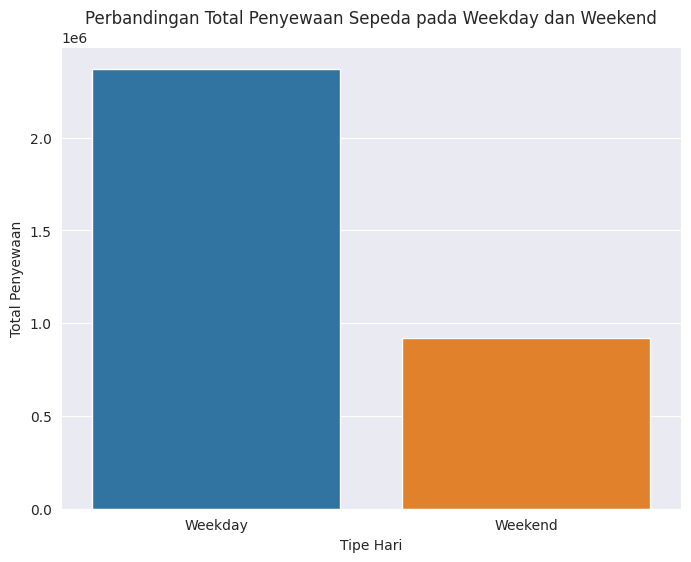

In [16]:
# Menghitung total penyewaan berdasarkan jenis hari (Weekday vs Weekend)
day_type_counts = day_df.groupby('day_type')['total_count'].sum().reset_index()

# Visualisasi perbandingan penyewaan sepeda pada Weekday dan Weekend
plt.figure(figsize=(8,6))
sns.barplot(x='day_type', y='total_count', data=day_type_counts, hue='day_type', dodge=False)
plt.title('Perbandingan Total Penyewaan Sepeda pada Weekday dan Weekend')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Penyewaan')
plt.legend([],[], frameon=False)  # Menghilangkan legenda sesuai rekomendasi
plt.show()

### Pertanyaan 2:

<ipython-input-17-8ed31e2cb396>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = day_df.groupby('weather_situation')['total_count'].sum().reset_index()
<ipython-input-17-8ed31e2cb396>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_situation', y='total_count', data=weather_counts, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.

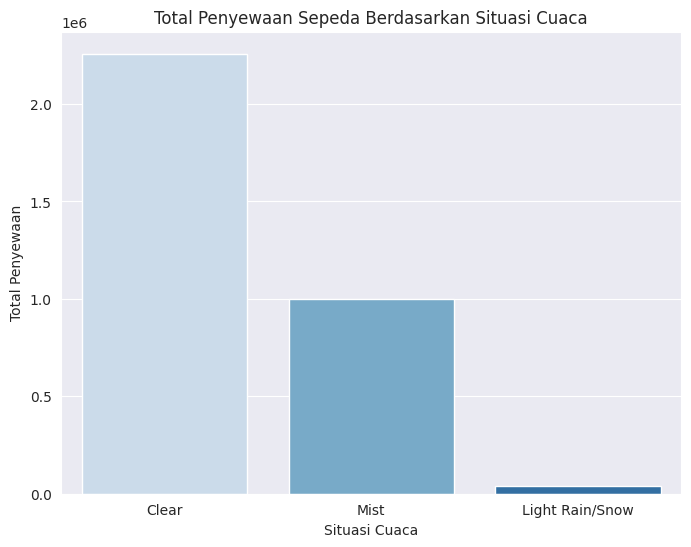

In [17]:
# Menghitung total penyewaan berdasarkan situasi cuaca
weather_counts = day_df.groupby('weather_situation')['total_count'].sum().reset_index()

# Visualisasi pengaruh cuaca terhadap total penyewaan
plt.figure(figsize=(8,6))
sns.barplot(x='weather_situation', y='total_count', data=weather_counts, palette='Blues')
plt.title('Total Penyewaan Sepeda Berdasarkan Situasi Cuaca')
plt.xlabel('Situasi Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

## Analisis Lanjutan (Opsional)

Korelasi antara faktor cuaca dan penyewaan sepeda:
                 temp  humidity  windspeed  total_count
temp         1.000000  0.126963  -0.157944     0.627494
humidity     0.126963  1.000000  -0.248489    -0.100659
windspeed   -0.157944 -0.248489   1.000000    -0.234545
total_count  0.627494 -0.100659  -0.234545     1.000000


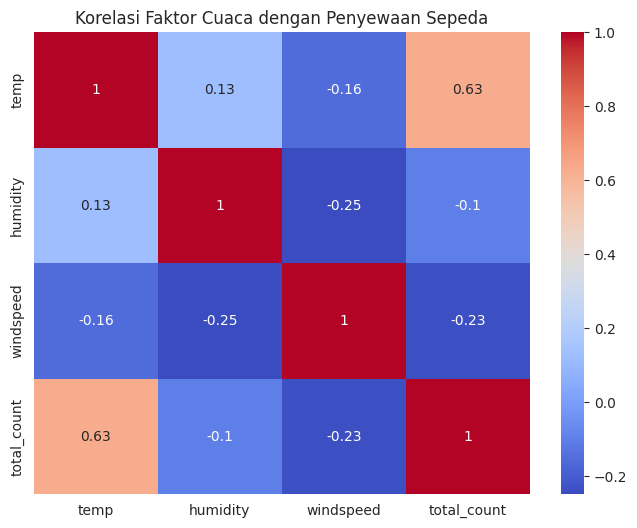

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
all_df = day_df.copy()

# Analisis Korelasi antara Faktor Cuaca dan Penyewaan Sepeda
correlation = day_df[['temp', 'humidity', 'windspeed', 'total_count']].corr()
print("Korelasi antara faktor cuaca dan penyewaan sepeda:")
print(correlation)

# Visualisasi Heatmap Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Korelasi Faktor Cuaca dengan Penyewaan Sepeda')
plt.show()

# Menyimpan DataFrame all_df ke dalam file CSV
all_df.to_csv("all_data.csv", index=False)

# Download the CSV file
files.download('all_data.csv')

## Conclusion

- Conclution pertanyaan 1
 - Penyewaan sepeda cenderung lebih banyak terjadi pada hari kerja dibandingkan akhir pekan, yang menunjukkan bahwa sepeda lebih sering digunakan sebagai transportasi sehari-hari.
- Conclution pertanyaan 2
 - Cuaca cerah meningkatkan penyewaan sepeda, sedangkan cuaca buruk seperti hujan atau salju menurunkan jumlah penyewaan